## Importar librerias

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn.metrics as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import scipy.stats as st
import locale 
import janitor
import upsetplot
import missingno as msno
%run pandas-missing-extension.ipynb

# datos crudos

In [76]:
countries = pd.read_csv("../data/external/countries_gdp_hist.csv",delimiter=";",encoding="utf-8")
organization_gpd = pd.read_csv("../data/external/organizations_gdp_hist.csv",delimiter=",",encoding="utf-8").rename(columns={"Unnamed: 0":"index","region_name":"region"},inplace=True)

In [77]:
countries

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.000000e+00,0.000000,0.000000
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.000000e+00,0.000000,0.000000
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.000000e+00,0.000000,0.000000
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.000000e+00,0.000000,0.000000
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
13325,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2017,1.758489e+10,17584.890937,4.080264
13326,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2018,3.415607e+10,34156.069918,5.009867
13327,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2019,2.183223e+10,21832.234926,-6.332446
13328,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2020,2.150970e+10,21509.698406,-7.816951


In [78]:
organization_gpd

## unir los dos dataset

In [79]:
merge_pib = pd.concat([countries,organization_gpd])

In [80]:
merge_pib

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.000000e+00,0.000000,0.000000
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.000000e+00,0.000000,0.000000
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.000000e+00,0.000000,0.000000
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.000000e+00,0.000000,0.000000
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
13325,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2017,1.758489e+10,17584.890937,4.080264
13326,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2018,3.415607e+10,34156.069918,5.009867
13327,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2019,2.183223e+10,21832.234926,-6.332446
13328,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2020,2.150970e+10,21509.698406,-7.816951


## informe basico sobre los datos nulos

In [81]:
merge_pib.shape


(13330, 10)

In [82]:
print(f"tenemos filas {merge_pib.shape[0]} tenemos columnas {merge_pib.shape[1]}")

tenemos filas 13330 tenemos columnas 10


### conteo de valores nulos

In [83]:
merge_pib.isna().sum().reset_index(name="count")

,index,count
0,country_code,0
1,region_name,0
2,sub_region_name,0
3,intermediate_region,0
4,country_name,0
5,income_group,0
6,year,0
7,total_gdp,0
8,total_gdp_million,0
9,gdp_variation,0


In [84]:
merge_pib.dtypes.isna()

country_code           False
region_name            False
sub_region_name        False
intermediate_region    False
country_name           False
income_group           False
year                   False
total_gdp              False
total_gdp_million      False
gdp_variation          False
dtype: bool

In [85]:
number_missing=merge_pib.missing.number_missing()
print(f"numero total de valores faltantes {number_missing}")

numero total de valores faltantes 0


In [86]:
numbers_completed=merge_pib.missing.number_complete()
print(f"total de datos completos {numbers_completed}")

total de datos completos 133300


## valores faltantes por variable 

In [87]:
merge_pib.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,country_code,0,13330,0.0
1,region_name,0,13330,0.0
2,sub_region_name,0,13330,0.0
3,intermediate_region,0,13330,0.0
4,country_name,0,13330,0.0
5,income_group,0,13330,0.0
6,year,0,13330,0.0
7,total_gdp,0,13330,0.0
8,total_gdp_million,0,13330,0.0
9,gdp_variation,0,13330,0.0


## valores faltantes por fila

In [88]:
merge_pib.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
13325,13325,0,0.0
13326,13326,0,0.0
13327,13327,0,0.0
13328,13328,0,0.0


In [89]:
merge_pib.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,100.0


In [90]:
merge_pib.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,13330,100.0


### visualizar los datos faltantes

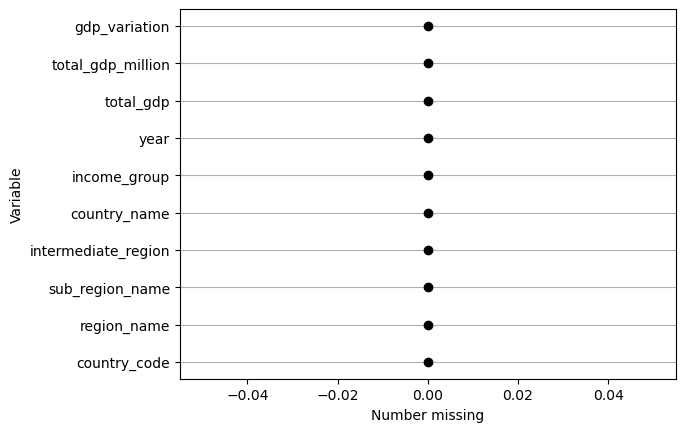

In [91]:
merge_pib.missing.missing_variable_plot()

<Axes: >

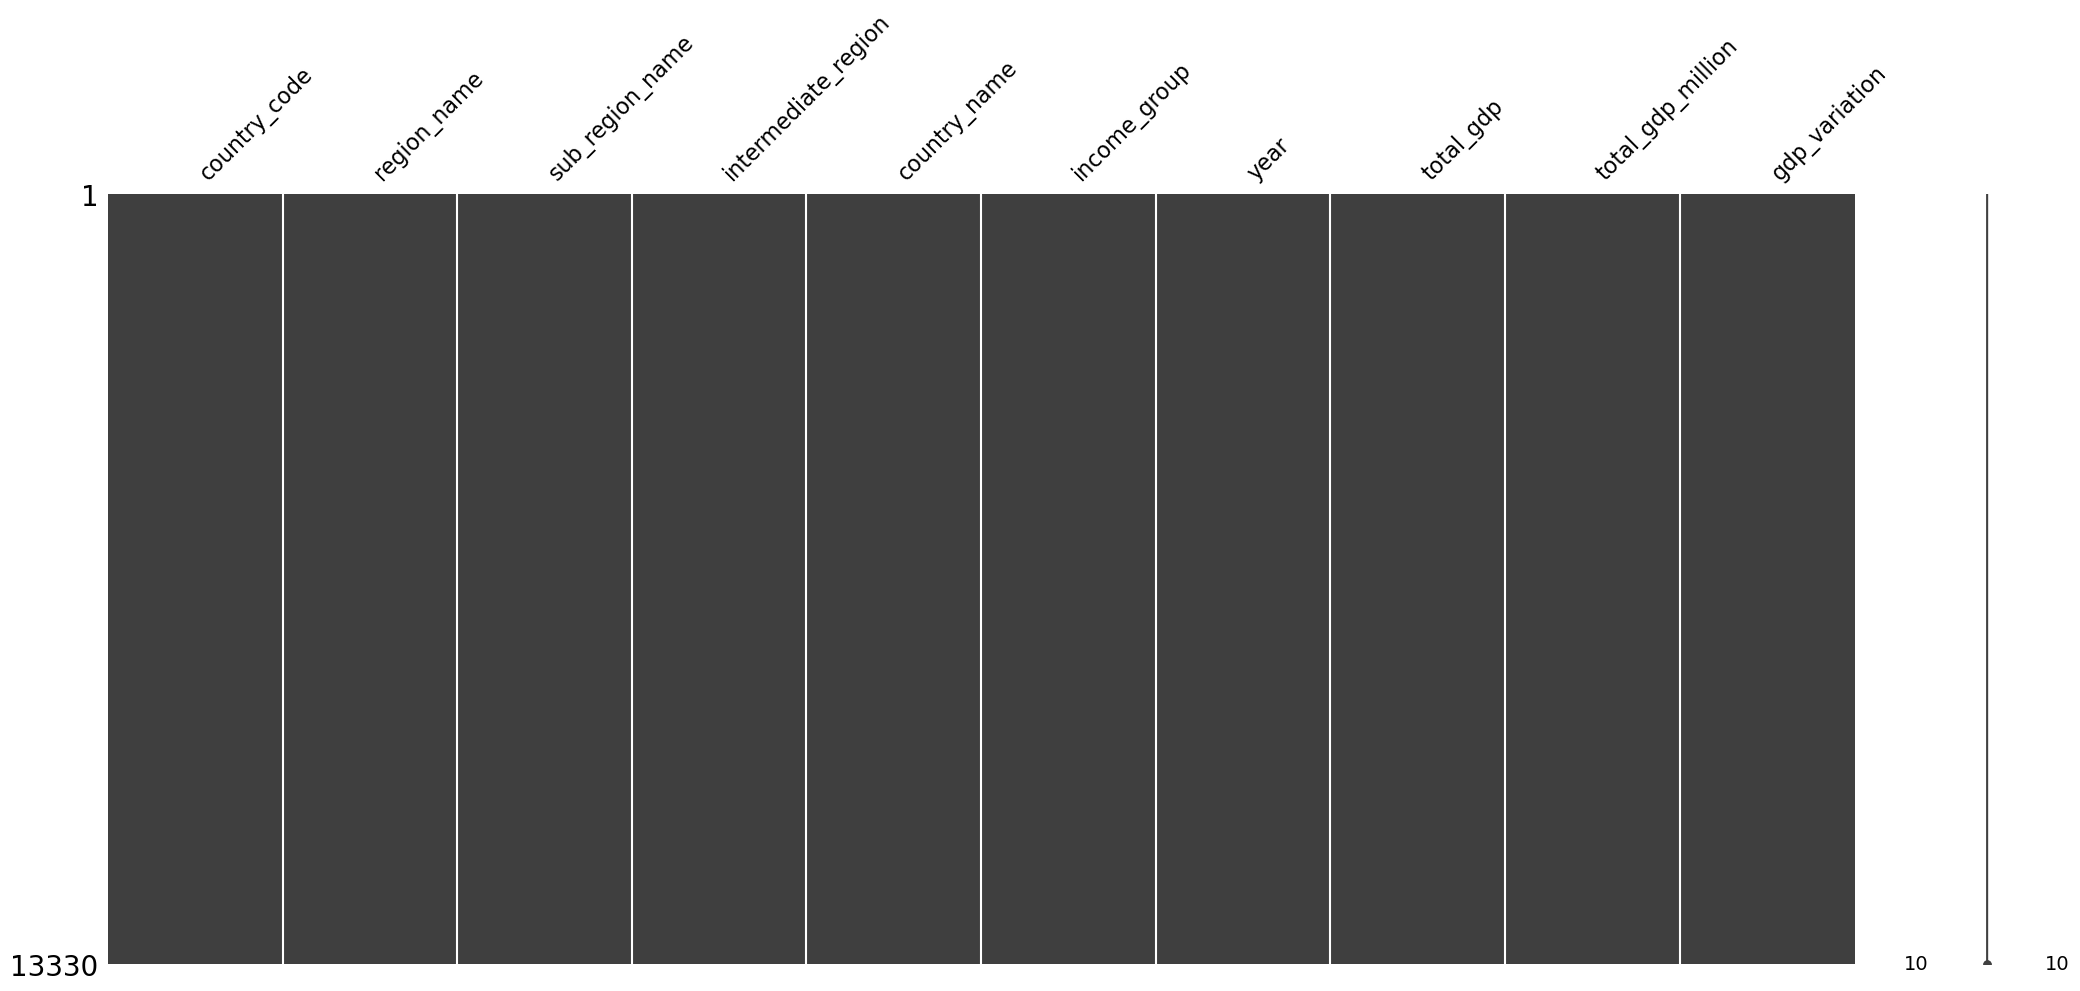

In [93]:
msno.matrix(merge_pib)

In [97]:
merge_pib.to_csv("../data/processed/pib_proccessed.csv")